### BERT

In [1]:
import torch 
import pandas as pd 
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'torch'

In [2]:
df = pd.read_csv('Datasets/emotion_sentimen_dataset.csv')

In [3]:
df.head(13)

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral
5,5,i feel jealous becasue i wanted that kind of l...,love
6,6,when a friend of mine keeps telling me morbid ...,neutral
7,7,i finally fell asleep feeling angry useless an...,worry
8,8,i feel a bit annoyed and antsy in a good way,neutral
9,9,i feel like i ve regained another vital part o...,neutral


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839555 entries, 0 to 839554
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  839555 non-null  int64 
 1   text        839555 non-null  object
 2   Emotion     839555 non-null  object
dtypes: int64(1), object(2)
memory usage: 19.2+ MB


In [5]:
# checking for null values
df.isnull().sum()

Unnamed: 0    0
text          0
Emotion       0
dtype: int64

In [6]:
#removing duplicated columns
df.drop_duplicates()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral
...,...,...,...
839550,839550,i feel like telling these horny devils to find...,neutral
839551,839551,i began to realize that when i was feeling agi...,neutral
839552,839552,i feel very curious be why previous early dawn...,neutral
839553,839553,i feel that becuase of the tyranical nature of...,neutral


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,text,Emotion
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral
...,...,...
839550,i feel like telling these horny devils to find...,neutral
839551,i began to realize that when i was feeling agi...,neutral
839552,i feel very curious be why previous early dawn...,neutral
839553,i feel that becuase of the tyranical nature of...,neutral


In [8]:
df.Emotion.value_counts()

Emotion
neutral       674538
love           39553
happiness      27175
sadness        17481
relief         16729
hate           15267
anger          12336
fun            10075
enthusiasm      9304
surprise        6954
empty           5542
worry           4475
boredom          126
Name: count, dtype: int64

In [9]:
# drop irrelevent class 
df = df[~df.Emotion.str.contains('\|')]

#drop irrelevent nocode
df= df[df.Emotion !='nocode']

#final class
df.Emotion.value_counts()

Emotion
neutral       674538
love           39553
happiness      27175
sadness        17481
relief         16729
hate           15267
anger          12336
fun            10075
enthusiasm      9304
surprise        6954
empty           5542
worry           4475
boredom          126
Name: count, dtype: int64

C:\Users\Hp\AppData\Local\Temp\ipykernel_25336\3049913896.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df.Emotion, palette='Blues')


Text(0, 0.5, 'Class Distribution')

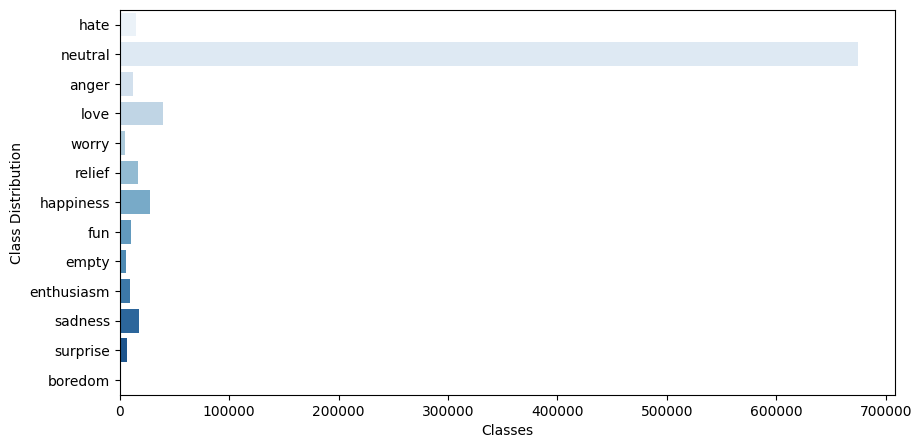

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 

#plot class distribution
plt.figure(figsize=(10,5))
sns.countplot(df.Emotion, palette='Blues')
plt.xlabel('Classes')
plt.ylabel('Class Distribution')

In [11]:
possible_labels = df.Emotion.unique()
label_dict = {} # Creating an empty Dict, & Looping over the possible labels 
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [12]:
label_dict

{'hate': 0,
 'neutral': 1,
 'anger': 2,
 'love': 3,
 'worry': 4,
 'relief': 5,
 'happiness': 6,
 'fun': 7,
 'empty': 8,
 'enthusiasm': 9,
 'sadness': 10,
 'surprise': 11,
 'boredom': 12}

In [13]:
#converting labels into numeric values 
df['label']=df.Emotion.replace(label_dict)
df.head(10)

,text,Emotion,label
0,i seriously hate one subject to death but now ...,hate,0
1,im so full of life i feel appalled,neutral,1
2,i sit here to write i start to dig out my feel...,neutral,1
3,ive been really angry with r and i feel like a...,anger,2
4,i feel suspicious if there is no one outside l...,neutral,1
5,i feel jealous becasue i wanted that kind of l...,love,3
6,when a friend of mine keeps telling me morbid ...,neutral,1
7,i finally fell asleep feeling angry useless an...,worry,4
8,i feel a bit annoyed and antsy in a good way,neutral,1
9,i feel like i ve regained another vital part o...,neutral,1


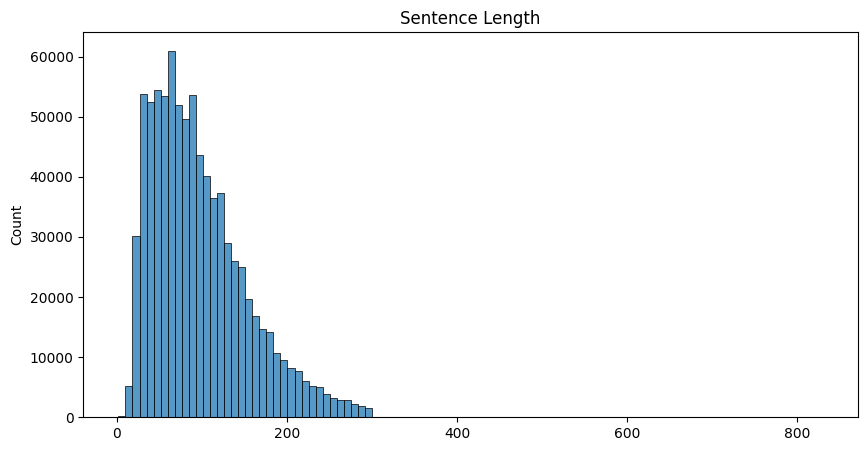

In [14]:
#neec equal length sentences 
#plot hist of sentence length 
plt.figure (figsize=(10, 5))
sns.histplot([len(s) for s in df.text], bins=100)
plt.title('Sentence Length')
plt.show()

In [15]:
#finding the maximum length 
max_len = max([len(sent) for sent in df.text])
print('Max lenght:',max_len)

Max lenght: 830


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_val, y_train, y_val = train_test_split(
    df.index.values, 
    df.label.values, 
    test_size = 0.15,
    random_state = 17,
    stratify = df.label.values
)

In [18]:
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

In [19]:
df.groupby(['Emotion', 'label', 'data_type']).count()

text
Emotion    label data_type        
anger      2     train       10485
                 val          1851
boredom    12    train         107
                 val            19
empty      8     train        4711
                 val           831
enthusiasm 9     train        7908
                 val          1396
fun        7     train        8564
                 val          1511
happiness  6     train       23099
                 val          4076
hate       0     train       12977
                 val          2290
love       3     train       33620
                 val          5933
neutral    1     train      573357
                 val        101181
relief     5     train       14219
                 val          2510
sadness    10    train       14859
                 val          2622
surprise   11    train        5911
                 val          1043
worry      4     train        3804
                 val           671

In [20]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [21]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [22]:
# Encoding the Training data
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

# Encoding the Validation data
encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)
#converting data type to torch.tensor
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [23]:
# Creating two different dataset 
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [24]:
len(dataset_train)

713621

In [25]:
len(dataset_val)

125934

In [26]:
# Setting up pre-trained model

In [27]:
from transformers import BertForSequenceClassification

#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                      num_labels = len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_11": 11,
    "LABEL_12": 12,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
 

In [29]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

# we need two different dataloader 
dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)
dataloader_train = DataLoader(dataset_val, 
                              sampler=RandomSampler(dataset_val),
                              batch_size=batch_size)

In [30]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [31]:
optimizer= AdamW(model.parameters(), 
                lr=1e-5,
                eps=1e-8)

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [32]:
epochs = 5

scheduler= get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [33]:
import numpy as np 

In [34]:
from sklearn.metrics import f1_score

In [35]:
def f1_score_func(preds, labels):

    # Setting up the preds to axis=1
    # Flatting it to a single iterable list of array
    preds_flat = np.argmax(preds, axis=1).flatten()

    # Flattening the labels
    labels_flat = labels.flatten()

    # Returning the f1_score as define by sklearn
    return f1_score(labels_flat, preds_flat, average='weighted')

In [36]:
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    # Iterating over all the unique labels
    # label_flat are the --> True labels
    for label in np.unique(labels_flat):
        # Taking out all the pred_flat where the True alable is the lable we care about.
        # e.g. for the label Happy -- we Takes all Prediction for true happy flag
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [37]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [38]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cpu


In [39]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()          # Sending our model in Training mode
    
    loss_train_total = 0   # Setting the training loss to zero initially

    # Setting up the Progress bar to Moniter the progress of training
    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad() # As we not working with thew RNN's
        
        # As our dataloader has '3' iteams so batches will be the Tuple of '3'
        batch = tuple(b.to(device) for b in batch)
        
        # INPUTS
        # Pulling out the inputs in the form of dictionary
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        # OUTPUTS
        outputs = model(**inputs) # '**' Unpacking the dictionary stright into the input
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()           # backpropagation
         # Gradient Clipping -- Taking the Grad. & gives it a NORM value ~ 1 
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/3936 [00:00<?, ?it/s]